In [126]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [127]:
df = pd.read_csv("C:\\Users\\Prathamesh\\Desktop\\CSV_Projects\\biomechanical-features-of-orthopedic-patients\\column_2C_weka.csv")

In [129]:
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


In [12]:
df.tail()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [13]:
df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


## Features: pelvic_incidence, pelvic_tilt_numeric, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis

## Target variable: Class (Normal or Abnormal)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


# Step 1 : Data Cleaning

## Check for missing values using seaborn heatmap

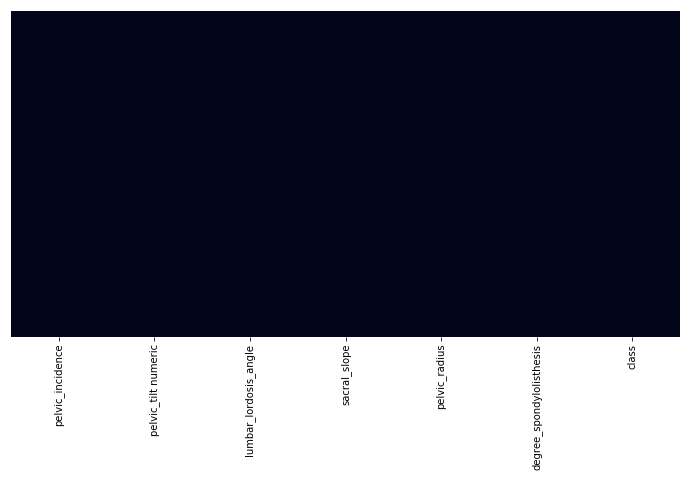

In [15]:
plt.figure(figsize=(12,6))

sns.heatmap(data = df.isnull(),
           yticklabels=False,
           cbar=False)
plt.show()

## No missing values found in the dataset

# Step 2: Exploratory Data Analysis or EDA

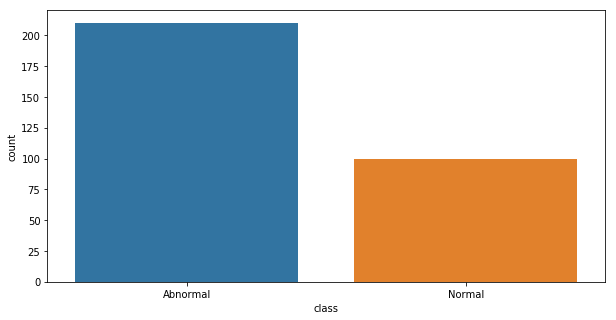

In [16]:
plt.figure(figsize=(10,5))

sns.countplot(data = df,
             x="class")

plt.show()

## Heatmap correlation:

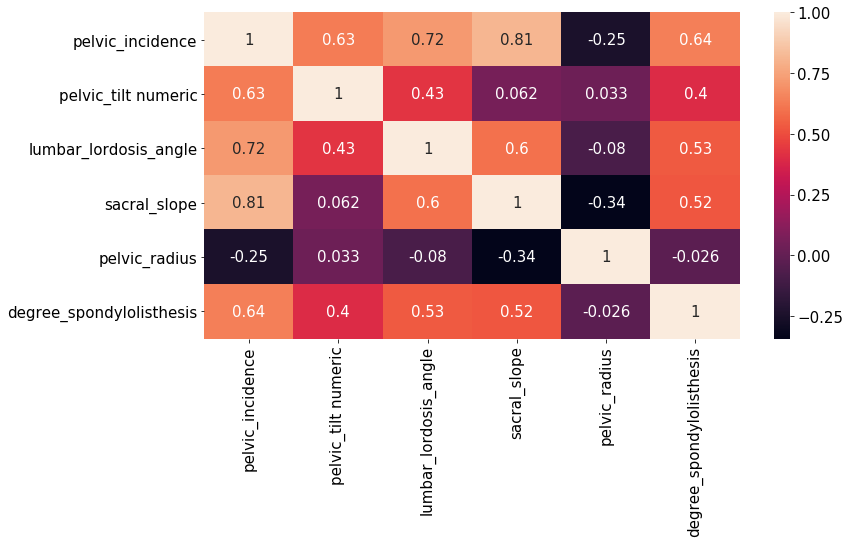

In [17]:
plt.figure(figsize = (12,6))

plt.rcParams.update({'font.size':15})

sns.heatmap(data = df.corr(),
           annot = True)

plt.show()

## Pairplot correlation:

<Figure size 864x432 with 0 Axes>

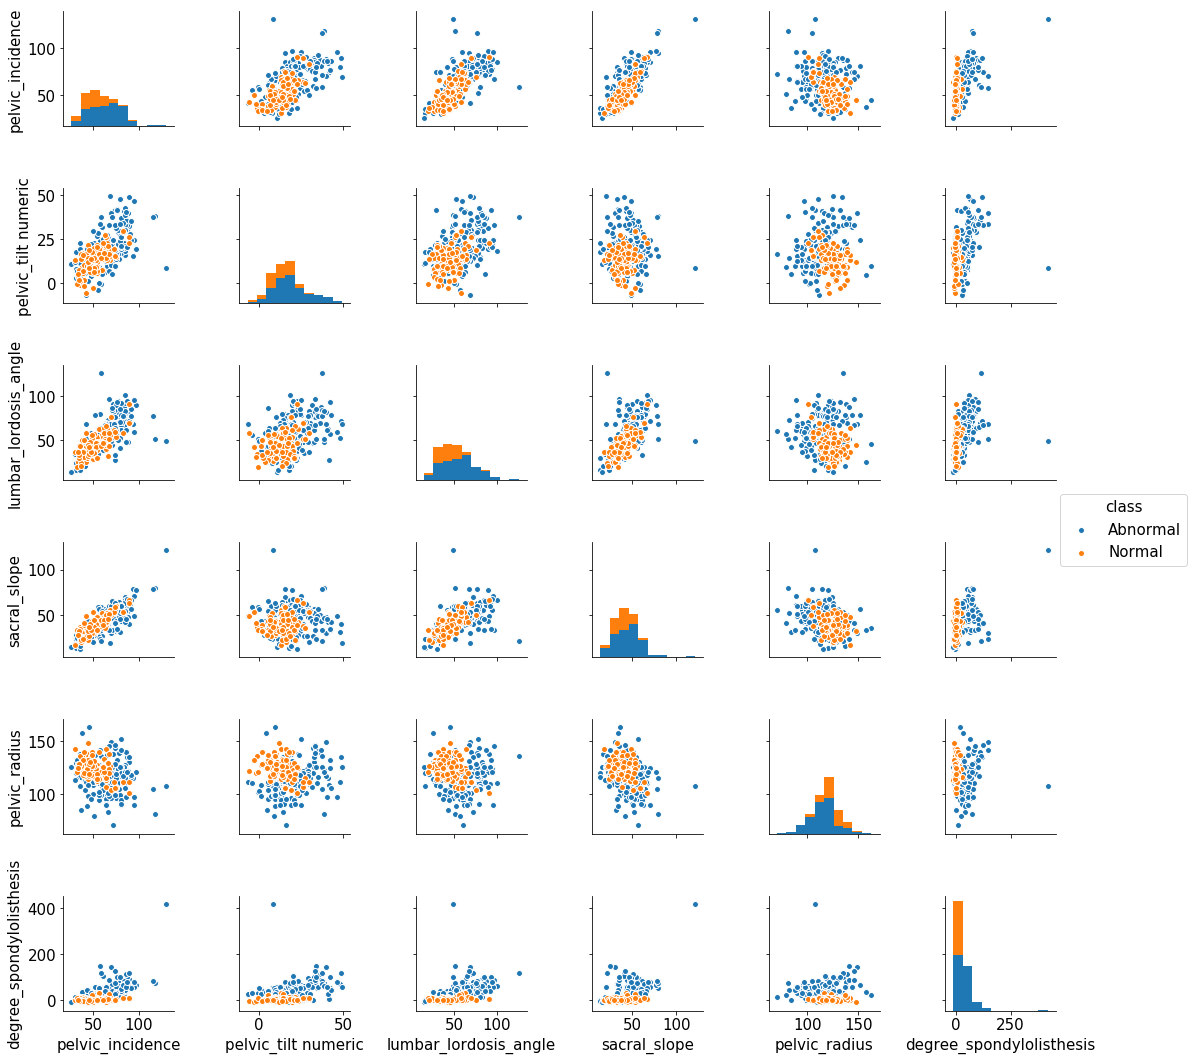

In [18]:
plt.figure(figsize=(12,6))

sns.pairplot(data = df, 
             hue="class")


plt.show()

## High correlation observed in : 
###  pelvic_incidence, sacral_slope, lumbar_lordosis angle

# Step 3: Machine Learning

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

## 3.1: Preparing the Data

In [20]:
df["class"] = df["class"].map({"Normal":1, "Abnormal":0})

## 3.2: Train -> Test -> Split 

In [21]:
X = df[["pelvic_incidence","pelvic_tilt numeric","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis"]]

y = df[["class"]]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 1) 

## 3.3.1: Logistic Regression

Classification_Report : 
             precision    recall  f1-score   support

          0       0.88      0.88      0.88        42
          1       0.75      0.75      0.75        20

avg / total       0.84      0.84      0.84        62



Confusion_Matrix : 


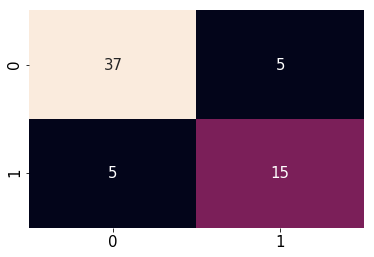



Accuracy Score = 83.87 %


Cross Validation score: [41.34615385 89.32038835 85.4368932 ]


In [23]:
from sklearn.linear_model import LogisticRegression

reg_1 = LogisticRegression()

reg_1.fit(X_train, y_train)

pred_1 = reg_1.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test, pred_1))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_1),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_1)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(reg_1,X,y)*100))

## 3.3.2 : Support Vector Machine 

Classification_Report : 
             precision    recall  f1-score   support

          0       0.68      1.00      0.81        42
          1       0.00      0.00      0.00        20

avg / total       0.46      0.68      0.55        62



Confusion_Matrix : 


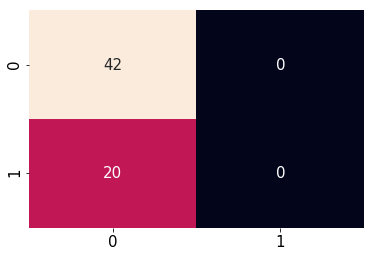



Accuracy Score = 67.74 %


Cross Validation score: [67.30769231 67.96116505 67.96116505]


In [37]:
from sklearn.svm import SVC

svc_2 = SVC()

svc_2.fit(X_train, y_train)

pred_2 = svc_2.predict(X_test)



print("Classification_Report : ")
print(classification_report(y_test, pred_2))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_2),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_2)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(svc_2,X,y)*100))

## 3.3.3 : Random Forest Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.89      0.98      0.93        42
          1       0.94      0.75      0.83        20

avg / total       0.91      0.90      0.90        62



Confusion_Matrix : 


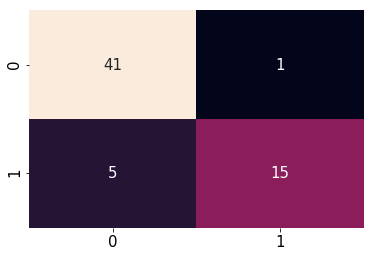



Accuracy Score = 90.32 %


Cross Validation score: [42.30769231 87.37864078 84.46601942]


In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

pred_3 = rfc.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test, pred_3))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_3),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_3)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(rfc,X,y)*100))

## 3.3.4 : K Nearest Neighbors

Classification_Report : 
             precision    recall  f1-score   support

          0       0.88      0.90      0.89        42
          1       0.79      0.75      0.77        20

avg / total       0.85      0.85      0.85        62



Confusion_Matrix : 


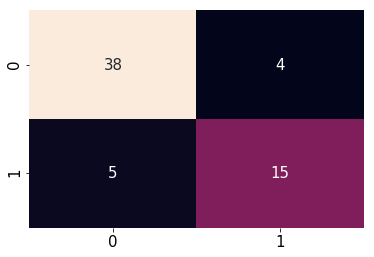



Accuracy Score = 85.48 %


Cross Validation score: [41.34615385 90.29126214 89.32038835]


In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

pred_4 = knn.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test, pred_4))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_4),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_4)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(knn,X,y)*100))

## 3.3.5 : AdaBoost Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.85      0.83      0.84        42
          1       0.67      0.70      0.68        20

avg / total       0.79      0.79      0.79        62



Confusion_Matrix : 


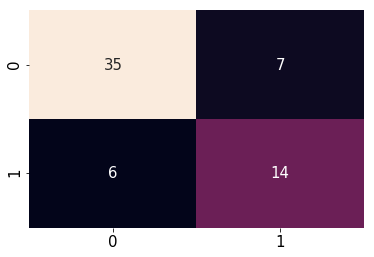



Accuracy Score = 79.03 %


Cross Validation score: [47.11538462 85.4368932  88.34951456]


In [79]:
from sklearn.ensemble import AdaBoostClassifier

ab_class = AdaBoostClassifier()

ab_class.fit(X_train, y_train)

pred_5 = ab_class.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test, pred_5))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_5),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_5)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(ab_class,X,y)*100))

## 3.3.6 : Naive Bayes

Classification_Report : 
             precision    recall  f1-score   support

          0       0.94      0.79      0.86        42
          1       0.67      0.90      0.77        20

avg / total       0.85      0.82      0.83        62



Confusion_Matrix : 


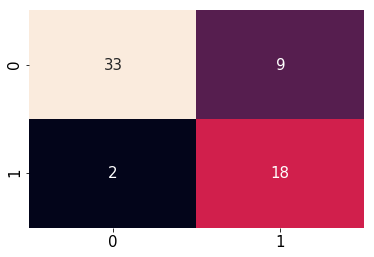



Accuracy Score = 82.26 %


Cross Validation score: [41.34615385 95.14563107 97.08737864]


In [99]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

pred_6 = gnb.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test, pred_6))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_6),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_6)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(gnb,X,y)*100))

## 3.3.7 : Decision Trees

Classification_Report : 
             precision    recall  f1-score   support

          0       0.86      0.88      0.87        42
          1       0.74      0.70      0.72        20

avg / total       0.82      0.82      0.82        62



Confusion_Matrix : 


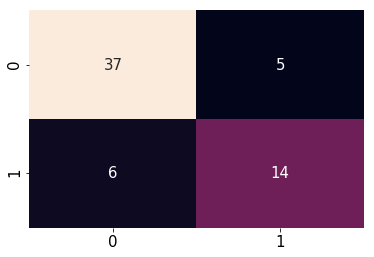



Accuracy Score = 82.26 %


Cross Validation score: [45.19230769 87.37864078 86.40776699]


In [122]:
from sklearn.tree import DecisionTreeClassifier

dt_class = DecisionTreeClassifier()

dt_class.fit(X_train, y_train)

pred_7 = dt_class.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test, pred_7))
print("\n")
print("Confusion_Matrix : ")
sns.heatmap(confusion_matrix(y_test,pred_7),annot=True,cbar=False)
plt.show()
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test, pred_7)*100,2))+" %")
print("\n")
print("Cross Validation score: "+str(cross_val_score(dt_class,X,y)*100))

# 3.4 : Summary 

In [124]:
summary = pd.DataFrame({"Model Used" : ["LogisticRegression","SVC","RandomForest","KNN","AdaBoostClassifier","NaiveBayesClass",
                                       "DecisionTreeAlgorithm"],
                        "Accuracy_of_prediction ( % )": [round(accuracy_score(y_test,pred_1)*100,2),
                                         round(accuracy_score(y_test,pred_2)*100,2),
                                         round(accuracy_score(y_test,pred_3)*100,2),
                                         round(accuracy_score(y_test,pred_4)*100,2),
                                         round(accuracy_score(y_test,pred_5)*100,2),
                                         round(accuracy_score(y_test,pred_6)*100,2),
                                         round(accuracy_score(y_test,pred_7)*100,2)]})

summary

,Model Used,Accuracy_of_prediction ( % )
0,LogisticRegression,83.87
1,SVC,67.74
2,RandomForest,90.32
3,KNN,85.48
4,AdaBoostClassifier,79.03
5,NaiveBayesClass,82.26
6,DecisionTreeAlgorithm,82.26
